1. Geographical map represent the city - Madikeri, Karnataka

In [ ]:
# Install required libraries
!pip install geopandas
!pip install folium

import geopandas as gpd
import folium

# Load the GeoJSON data
file_path_water = 'waterway_mdk.geojson'  # Adjust the file path accordingly
gdf_water = gpd.read_file(file_path_water)

file_path_nature = 'nature_mdk.geojson'  # Adjust the file path accordingly
gdf_nature = gpd.read_file(file_path_nature)

# Create a Folium map centered at the mean of all geometries
map_center = [gdf_water.geometry.centroid.y.mean(), gdf_water.geometry.centroid.x.mean()]
map_water_nature = folium.Map(location=map_center, zoom_start=13)

# Plot water features
for _, feature in gdf_water.iterrows():
    lat, lon = feature.geometry.centroid.y, feature.geometry.centroid.x
    name = feature['name'] if 'name' in feature else 'Water Area'
    water_marker = folium.Marker(
        [lat, lon],
        popup=name,
        icon=folium.Icon(color='blue', icon='tint', prefix='fa')
    )
    water_marker.add_to(map_water_nature)

# Plot nature features
for _, feature in gdf_nature.iterrows():
    lat, lon = feature.geometry.centroid.y, feature.geometry.centroid.x
    name = feature['name'] if 'name' in feature else 'Nature Area'
    nature_marker = folium.Marker(
        [lat, lon],
        popup=name,
        icon=folium.Icon(color='green', icon='tree', prefix='fa')
    )
    nature_marker.add_to(map_water_nature)

# Display the map
map_water_nature


<ipython-input-10-2895d055b02d>:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map_center = [gdf_water.geometry.centroid.y.mean(), gdf_water.geometry.centroid.x.mean()]


2. Heat map representing both water bodies and nature of that region.

In [ ]:
# Install required libraries
!pip install geopandas
!pip install folium

import geopandas as gpd
import folium
from folium.plugins import HeatMap

# Load the GeoJSON data
file_path_water = 'waterway_mdk.geojson'  # Adjust the file path accordingly
gdf_water = gpd.read_file(file_path_water)

file_path_nature = 'nature_mdk.geojson'  # Adjust the file path accordingly
gdf_nature = gpd.read_file(file_path_nature)

# Create a Folium map centered at the mean of all geometries
map_center = [gdf_water.geometry.centroid.y.mean(), gdf_water.geometry.centroid.x.mean()]
map_water_nature_heatmap = folium.Map(location=map_center, zoom_start=13)

# Create a HeatMap for water features
heat_data_water = [[point.xy[1][0], point.xy[0][0]] for point in gdf_water.geometry.centroid]
HeatMap(heat_data_water, radius=15).add_to(map_water_nature_heatmap)

# Create a HeatMap for nature features
heat_data_nature = [[point.xy[1][0], point.xy[0][0]] for point in gdf_nature.geometry.centroid]
HeatMap(heat_data_nature, radius=15).add_to(map_water_nature_heatmap)

# Display the map
map_water_nature_heatmap


<ipython-input-41-c97315cefe04>:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map_center = [gdf_water.geometry.centroid.y.mean(), gdf_water.geometry.centroid.x.mean()]
<ipython-input-41-c97315cefe04>:21: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  heat_data_water = [[point.xy[1][0], point.xy[0][0]] for point in gdf_water.geometry.centroid]
<ipython-input-41-c97315cefe04>:25: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  heat_data_nature = [[point.xy[1][0], point.xy[0][0]] for point in gdf_nature.geometry.centroid]


3. Choropleth map brings the map of waterways and forest area in Madikeri

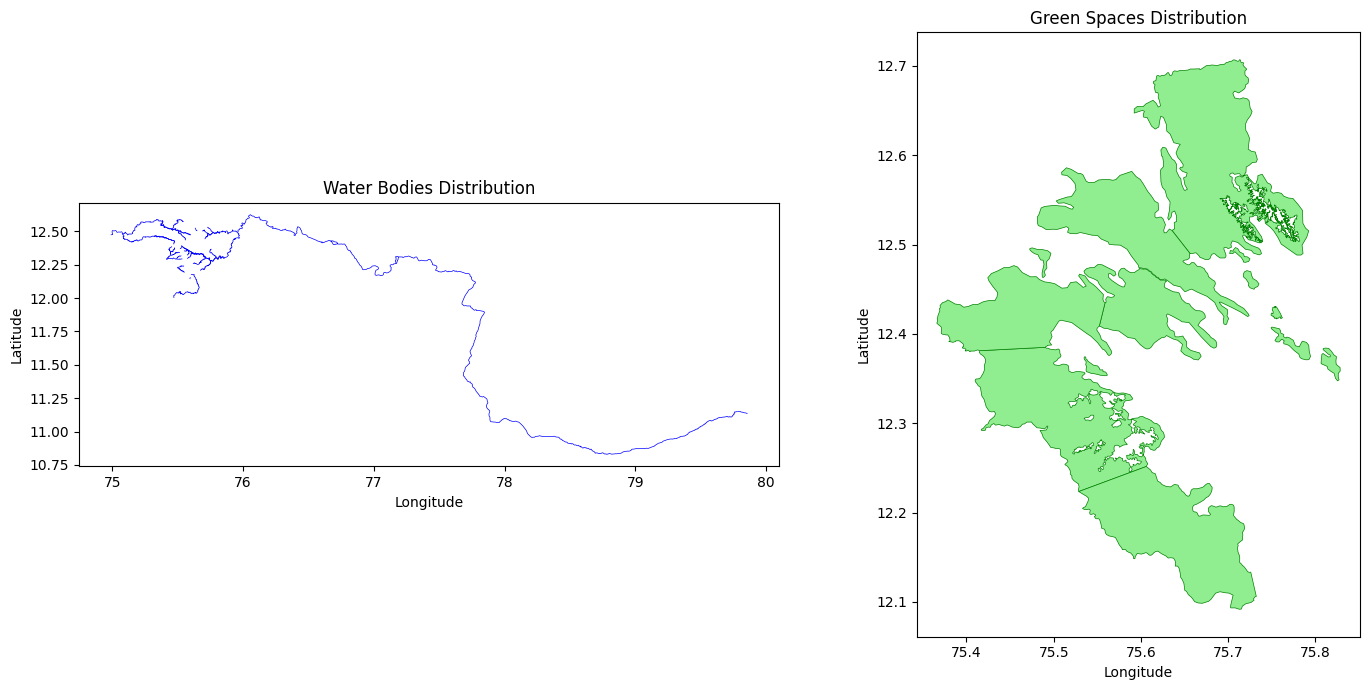

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the GeoJSON data for water bodies
file_path_water = 'waterway_mdk.geojson'  # Adjust the file path accordingly
gdf_water = gpd.read_file(file_path_water)

# Load the GeoJSON data for nature areas
file_path_nature = 'nature_mdk.geojson'  # Adjust the file path accordingly
gdf_nature = gpd.read_file(file_path_nature)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Plot the distribution of water bodies
gdf_water.plot(ax=ax1, color='blue', edgecolor='black', linewidth=0.5)
ax1.set_title('Water Bodies Distribution')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')

# Plot the distribution of green spaces
gdf_nature.plot(ax=ax2, color='lightgreen', edgecolor='green', linewidth=0.5)
ax2.set_title('Green Spaces Distribution')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


4. Combination of both waterways and forest area

<ipython-input-39-768bf54e81a9>:28: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


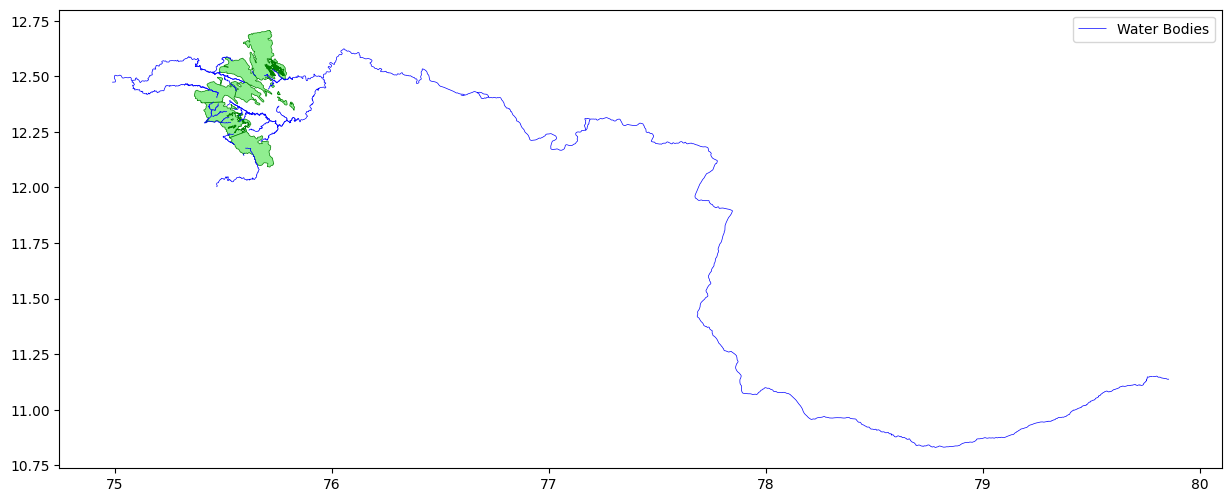

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the GeoJSON data for water bodies
file_path_water = 'waterway_mdk.geojson'  # Adjust the file path accordingly
gdf_water = gpd.read_file(file_path_water)

# Load the GeoJSON data for nature areas
file_path_nature = 'nature_mdk.geojson'  # Adjust the file path accordingly
gdf_nature = gpd.read_file(file_path_nature)

# Create a single subplot
fig, ax = plt.subplots(figsize=(15, 7))

# Calculate area for water bodies (assuming rectangular shape)
gdf_water['area'] = gdf_water['width']  # You may need to adjust this based on your data

# Plot the distribution of water bodies with marker size based on area
gdf_water.plot(ax=ax, color='blue', edgecolor='black', linewidth=0.5, label='Water Bodies', markersize=gdf_water['area'])

# Calculate area for green spaces
gdf_nature['area'] = gdf_nature['natural']  # You may need to adjust this based on your data

# Plot the distribution of green spaces with marker size based on area
gdf_nature.plot(ax=ax, color='lightgreen', edgecolor='green', linewidth=0.5, label='Green Spaces', markersize=gdf_nature['area'])

# Add legend
ax.legend()

# Show the plot
plt.show()


5. Bar chart represent the area distribution of different waterbodies spread across Madikeri

Column Names: Index(['id', '@id', 'alt_name', 'boat', 'name', 'name:en', 'name:kn',
       'name:ml', 'name:ta', 'note', 'tourism', 'type', 'waterway', 'width',
       '@relations', 'wikidata', 'wikipedia', 'geometry'],
      dtype='object')


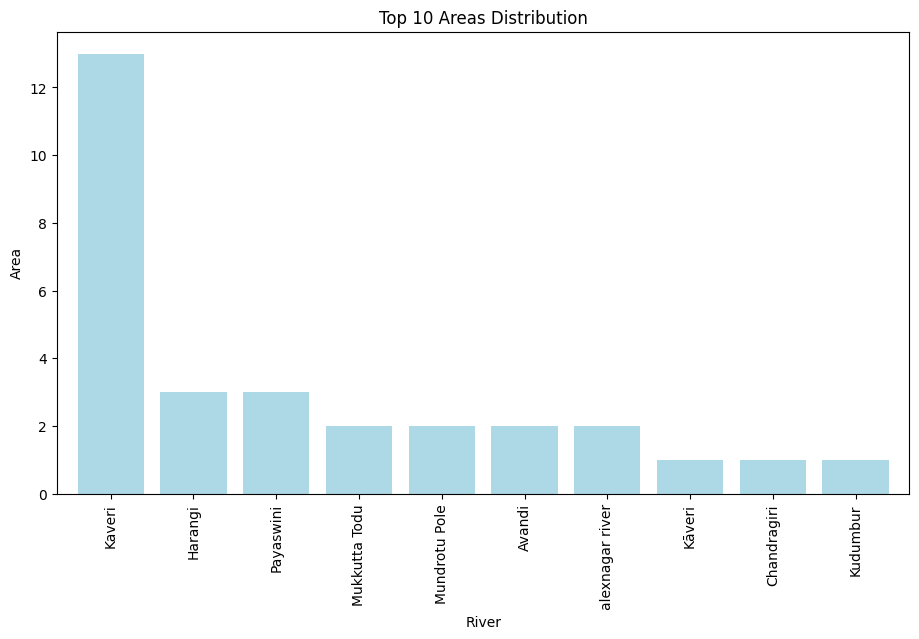

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the GeoJSON data
file_path = 'waterway_mdk.geojson'  # Replace with the actual path to your GeoJSON file
gdf = gpd.read_file(file_path)

# Print column names to identify the correct column for areas
print("Column Names:", gdf.columns)

# Assuming your GeoDataFrame has a column indicating the different areas
# Replace 'name' with the correct column name if needed
area_column_name = 'name'

# Get counts for each area
area_counts = gdf[area_column_name].value_counts()

# Select only the top 10 values
top_10_areas = area_counts.head(10)

# Create a bar chart
fig, ax = plt.subplots(figsize=(11, 6))

top_10_areas.plot(kind='bar', color='lightblue', width=0.8, ax=ax)

ax.set_xlabel('River')
ax.set_ylabel('Area')
ax.set_title('Top 10 Areas Distribution')

plt.show()



6. Bar chart represent the area distribution of forest region.

Column Names: Index(['id', '@id', 'natural', 'type', 'geometry'], dtype='object')


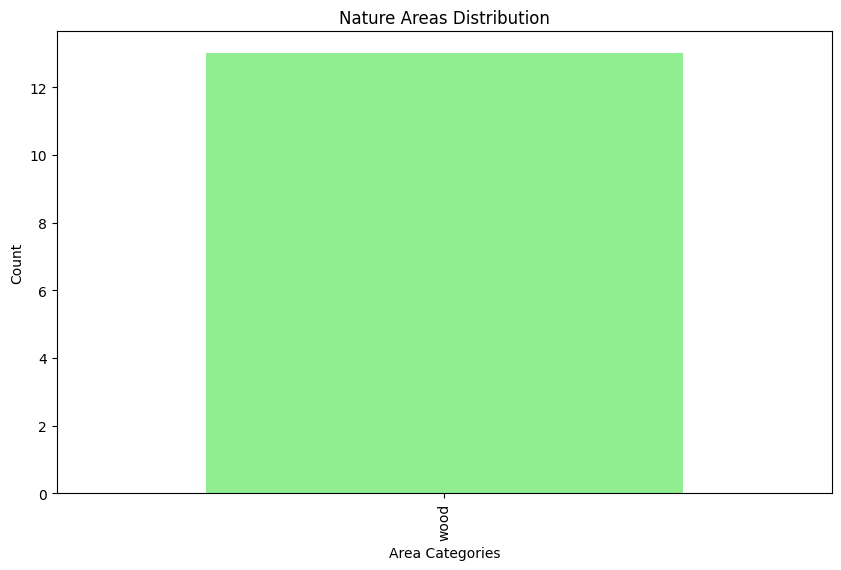

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the GeoJSON data
file_path = 'nature_mdk.geojson'  # Replace with the actual path to your GeoJSON file
gdf = gpd.read_file(file_path)

# Print column names to identify the correct column for areas
print("Column Names:", gdf.columns)

# Assuming your GeoDataFrame has a column indicating the different areas
# Replace 'natural' with the correct column name if needed
area_column_name = 'natural'

# Get counts for each area
area_counts = gdf[area_column_name].value_counts()

# Sort the areas by count in descending order
sorted_areas = area_counts.sort_values(ascending=False)

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))

sorted_areas.plot(kind='bar', color='lightgreen', width=0.8, ax=ax)

ax.set_xlabel('Area Categories')
ax.set_ylabel('Count')
ax.set_title('Nature Areas Distribution')

plt.show()


    Conclusion :
              The visualiszation between waterways and nature dataset at Madikeri, Karnataka clearly depict that the area all around Madikeri is surrounded with trees with river flowing in between.
              So urban planning is not suitable at madikeri because of its rich vegitation...and conservation efforts are highly welcomed to protect the nature.